![header](https://drive.google.com/uc?export=view&id=1KuEspEp7OwqGw6uMRJvYE6BVE-Zo-8JF)

 <h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

# Redes Neuronales Profundas para Clasificación Multiclase
### Se hace uso del dataset MNIST para reconocimiento de dígitos
### https://keras.io/api/datasets/

# Se cargan las bibliotecas necesarias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

# para el generador de aleatorios
np.random.seed(0)

# Se carga el dataset y se verifica el número de muestras en cada set
### Nótese que al hacer la carga, se genera automáticamente el set de entrenamiento y el set de pruebas
### Las imágenes son en escala de grises y de 28 por 28 pixeles

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
     
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


# Se verifica el número de muestras por dígito

Text(0, 0.5, 'Número de Muestras')

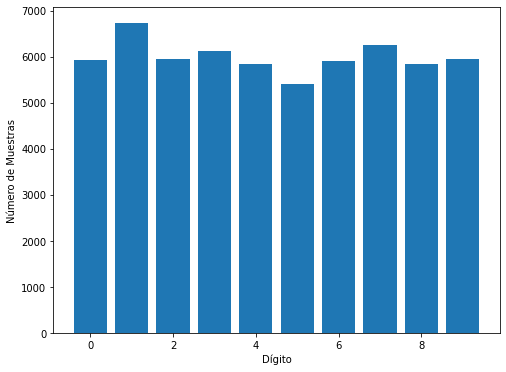

In [ ]:
n_muestras = []
n_digitos = 10

for n in range(n_digitos):
    x_sel = X_train[y_train == n]
    n_muestras.append(len(x_sel))
plt.figure(figsize=(8,6))
plt.bar(range(0,n_digitos), n_muestras)
plt.xlabel("Dígito")
plt.ylabel("Número de Muestras")

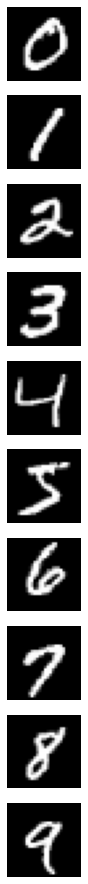

In [ ]:
n_digitos = 10

fig, axs = plt.subplots(n_digitos, figsize=(16,16))
for n in range(n_digitos):
    x_sel = X_train[y_train == n]
    axs[n].imshow(x_sel[0],cmap='gray')
    axs[n].axis('off')


# One-hot Encoding para las etiquetas de ambos sets

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Se normalizan las intensidades de los pixeles en un intervalo de 0 y 1

In [ ]:
X_train = X_train/255 
X_test = X_test/255

# Se unidimensionan las imágenes para adecuarlas como capa de entrada en la red neuronal

In [ ]:
# 28 x 28 = 784
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# Se define el modelo

In [ ]:
model = Sequential()
model.add(Dense(units = 30, input_dim=num_pixels, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='softmax'))
model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 23,970
Trainable params: 23,970
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Se separa un 10% del set de entrenamiento para fines de validación

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 4s 4ms/step - loss: 0.4159 - accuracy: 0.8703 - val_loss: 0.1872 - val_accuracy: 0.9445
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2023 - accuracy: 0.9400 - val_loss: 0.1634 - val_accuracy: 0.9527
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1753 - accuracy: 0.9483 - val_loss: 0.1555 - val_accuracy: 0.9565
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1565 - accuracy: 0.9532 - val_loss: 0.1328 - val_accuracy: 0.9638
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1391 - accuracy: 0.9576 - val_loss: 0.1403 - val_accuracy: 0.9617
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1329 - accuracy: 0.9599 - val_loss: 0.1338 - val_accuracy: 0.9625
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1262 - accuracy: 0.9603 - val_loss: 0.1629 - val_accuracy: 0.9545
Epoch 

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1596 - accuracy: 0.9565
Test loss: 0.15956632792949677
Test accuracy: 0.9564999938011169


Text(0.5, 0, 'epoch')

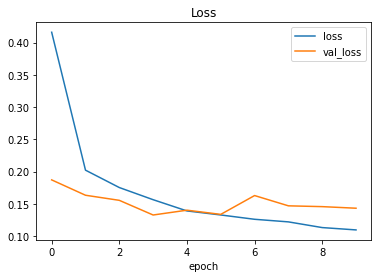

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

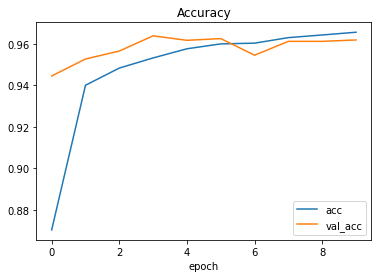

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

# Verificamos la clasificación con el set de prueba

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.15956632792949677
Test accuracy: 0.9564999938011169


# Se somete a prueba con una imagen de la web

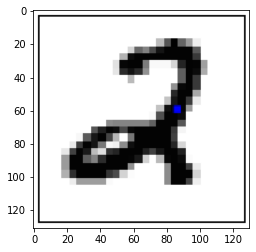

In [ ]:
import requests
from PIL import Image
     
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

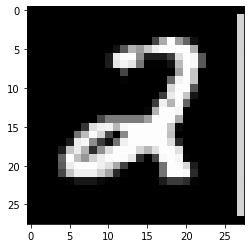

In [ ]:
import cv2
     
img_arr = np.asarray(img)
img_rs = cv2.resize(img_arr, (28, 28))
img_gray = cv2.cvtColor(img_rs, cv2.COLOR_BGR2GRAY)
img_not = cv2.bitwise_not(img_gray)
plt.imshow(img_not, cmap=plt.get_cmap('gray'))
     


In [ ]:
img_not = img_not/255
img_resh = img_not.reshape(1, 784)

prediction = np.argmax(model.predict(img_resh), axis=-1)
print("predicted digit:", str(prediction))

1/1 [==============================] - 0s 22ms/step
predicted digit: [2]


# Guardando y descargando el modelo

In [ ]:
model.save('model.h5')

from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Gracias por la atención